In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn import linear_model
import re
from scipy import stats

In [2]:
df = pd.read_csv("/Users/jigyasasachdeva/Desktop/Retail.csv")
df

,Unnamed: 0,catalogyears,age,gender,homeownership,maritalstatus,location,income,spent
0,1,3.0,Middle,Male,Own,Married,Out of state,87200,1274
1,2,1.0,Young,Female,Rent,Married,Out of state,79400,1175
2,3,2.0,Young,Female,Rent,Single,In state,13500,160
3,4,1.0,Middle,Female,Rent,Single,Out of state,36900,371
4,5,1.0,Middle,Male,Rent,Single,Out of state,39000,643
...,...,...,...,...,...,...,...,...,...
495,496,3.0,Old,Male,Own,Married,In state,59700,1857
496,497,3.0,Middle,Female,Own,Divorced,In state,34600,748
497,498,2.0,Young,Male,Rent,Single,Out of state,17700,268
498,499,4.0,Middle,Male,Own,Single,Out of state,61500,968


(array([101.,  56.,  86.,  72.,  75.,  48.,  18.,  23.,  14.,   7.]),
 array([ 10200.,  22250.,  34300.,  46350.,  58400.,  70450.,  82500.,
         94550., 106600., 118650., 130700.]),
 <a list of 10 Patch objects>)

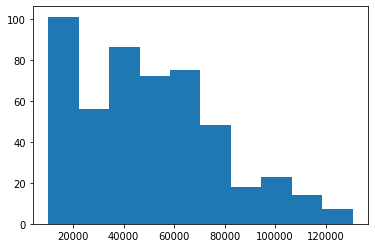

In [3]:
from scipy.stats import shapiro
#Shapiro Test
#Null hypothesis: Variable is normally distributed
p = shapiro(df.income)
p
pyplot.hist(df.income, bins =10)
#Since p value < 0.05: We reject the null hypothesis
#Income is not normally distributed

(array([63., 75., 76., 57., 52., 50., 42., 35., 29., 21.]),
 array([  43. ,  256.4,  469.8,  683.2,  896.6, 1110. , 1323.4, 1536.8,
        1750.2, 1963.6, 2177. ]),
 <a list of 10 Patch objects>)

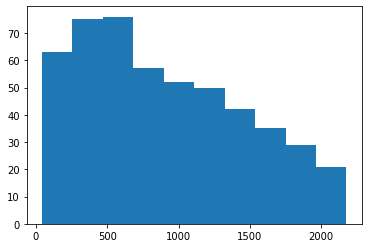

In [4]:
p = shapiro(df.spent)
p
pyplot.hist(df.spent, bins =10)
#Not normally distributed

In [5]:
#Data structure
data_type =['object', 'float', 'int'] 
desc = df.describe(include = data_type)
desc

,Unnamed: 0,catalogyears,age,gender,homeownership,maritalstatus,location,income,spent
count,500.000000,499.000000,500,500,500,500,500,500.000000,500.000000
unique,NaN,NaN,3,2,2,3,2,NaN,NaN
top,NaN,NaN,Middle,Female,Rent,Single,Out of state,NaN,NaN
freq,NaN,NaN,245,261,258,224,384,NaN,NaN
mean,250.500000,2.314629,NaN,NaN,NaN,NaN,NaN,50389.400000,907.990000
std,144.481833,1.093613,NaN,NaN,NaN,NaN,NaN,27498.514947,557.777477
min,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,10200.000000,43.000000
25%,125.750000,1.000000,NaN,NaN,NaN,NaN,NaN,26775.000000,425.500000
50%,250.500000,2.000000,NaN,NaN,NaN,NaN,NaN,47100.000000,819.500000
75%,375.250000,3.000000,NaN,NaN,NaN,NaN,NaN,66625.000000,1334.500000


{'whiskers': [<matplotlib.lines.Line2D at 0x127977130>,
 'caps': [<matplotlib.lines.Line2D at 0x1279777f0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x127968d60>],
 'medians': [<matplotlib.lines.Line2D at 0x127977eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1279821f0>],
 'means': []}

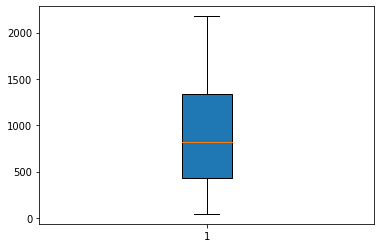

In [6]:
#Boxplot
pyplot.boxplot(df.spent, 
              patch_artist=True,  # fill with color
              )

In [7]:
#Linear Model: With income
import statsmodels.api as sm
x = df ['income']
y = df ['spent']
x = sm.add_constant(x)
mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary())
#R Squared in 38.4%
#Not significant

                            OLS Regression Results                            
Dep. Variable:                  spent   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     312.6
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.20e-54
Time:                        00:59:46   Log-Likelihood:                -3749.2
No. Observations:                 500   AIC:                             7502.
Df Residuals:                     498   BIC:                             7511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        273.2920     40.889      6.684      0.0

In [8]:
#Linear Model: With location
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()  
df['location']= le.fit_transform(df['location']) 

x = df['location']
x = sm.add_constant(x)
mod = sm.OLS(y, x)
res = mod.fit()

print(res.summary())

#R Squared in 0.2%
#Not significant

                            OLS Regression Results                            
Dep. Variable:                  spent   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.988
Date:                Mon, 10 Aug 2020   Prob (F-statistic):              0.159
Time:                        00:59:46   Log-Likelihood:                -3870.0
No. Observations:                 500   AIC:                             7744.
Df Residuals:                     498   BIC:                             7752.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        971.9224     51.737     18.786      0.0

In [9]:
#Linear Model: With marital status
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()  
df['maritalstatus']= le.fit_transform(df['maritalstatus']) 

x = df['maritalstatus']
x = sm.add_constant(x)
mod = sm.OLS(y, x)
res = mod.fit()

print(res.summary())

#R Squared in 3.8%
#Not significant

                            OLS Regression Results                            
Dep. Variable:                  spent   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     20.63
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           6.98e-06
Time:                        00:59:46   Log-Likelihood:                -3860.8
No. Observations:                 500   AIC:                             7726.
Df Residuals:                     498   BIC:                             7734.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1081.1956     45.305     23.865

In [10]:
#Linear Model: With homeownership

df['homeownership']= le.fit_transform(df['homeownership']) 
x = df['homeownership']
x = sm.add_constant(x)

mod = sm.OLS(y, x)
res = mod.fit()

print(res.summary())

#R Squared in 11%
#Not significant

                            OLS Regression Results                            
Dep. Variable:                  spent   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     62.44
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.77e-14
Time:                        00:59:46   Log-Likelihood:                -3841.4
No. Observations:                 500   AIC:                             7687.
Df Residuals:                     498   BIC:                             7695.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1100.0372     33.833     32.514

In [11]:
#Linear Model: With gender

df['gender']= le.fit_transform(df['gender']) 
x = df['gender']
x = sm.add_constant(x)

mod = sm.OLS(y, x)
res = mod.fit()

print(res.summary())

#R Squared in 5.3%
#Not significant

                            OLS Regression Results                            
Dep. Variable:                  spent   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     28.94
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.15e-07
Time:                        00:59:46   Log-Likelihood:                -3856.8
No. Observations:                 500   AIC:                             7718.
Df Residuals:                     498   BIC:                             7726.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        783.0307     33.598     23.306      0.0

In [12]:
#Linear Model: With age

df['age']= le.fit_transform(df['age']) 
x = df['age']
x = sm.add_constant(x)
mod = sm.OLS(y, x)
res = mod.fit()

print(res.summary())

#R Squared in 18.3%
#Not significant

                            OLS Regression Results                            
Dep. Variable:                  spent   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     112.5
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           7.69e-24
Time:                        00:59:46   Log-Likelihood:                -3820.0
No. Observations:                 500   AIC:                             7644.
Df Residuals:                     498   BIC:                             7652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1132.9662     30.957     36.598      0.0

In [13]:
#Linear Model: With catalogyears

df['catalogyears']= le.fit_transform(df['catalogyears']) 
x = df['catalogyears']
x = sm.add_constant(x)
mod = sm.OLS(y, x)
res = mod.fit()

print(res.summary())

#R Squared in 17
#Not significant

                            OLS Regression Results                            
Dep. Variable:                  spent   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     103.1
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           3.88e-22
Time:                        00:59:46   Log-Likelihood:                -3823.9
No. Observations:                 500   AIC:                             7652.
Df Residuals:                     498   BIC:                             7660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          630.5872     35.541     17.743   

In [14]:
#No model is able to justify the variance of spent